# Capstone Notebook  for collaboration restricted to non sensitive capstone activities





In [105]:
print ("Hello Capstone Project Course!")

Hello Capstone Project Course!


#  Table Of Contents 


- ## [Business Understanding](#Business-Understanding)
- ## [Data Requirements](#Data-Requirements)
- ## [Data Collection](#Data-Collection)
- ## [Data Understanding](#Data-Understanding)
- ## [Data Preparation](#Data-Preparation)
- ## [Data Modeling](#Data-Modeling)
- ## [Data Evaluation](#Data-Evaluation)
- ## [Conclusions](#Conclusions)

# Business Understanding  
- ## Introduction<br>
    - OVGuide is a specialization arm of ACME Inc renters and real estate management company. One of its new offering for its renters guide is to offer a holistic picture when using its guide for renting and purchasing local properties under its umberella. OVGuide wanted a specific question to be answered  before it pitched its beautiful properties in the postal codes and zip codes in Toronto  and New York city neighbourhoods.      
    - Would it make sense to pitch its properties as pedestrian friendly with aim of offering self sufficency for a budgeted lifestyle in relation to the business offerings in its neighbourhood. OVGuide wanted a general study of grocery shopping of raw vegetables  in the neighbourhood of it's property location as baseline for study using publically available data and some commercially available data in postal and zipcodes for Toronto and New York cit neighbourhoods.      
- ## Analytical Approach<br>
    - The raw unlabelled data for this neighbourhood  will be processed using clustering approach specifically K-means clustering using values (estimated Geographic Information Systems only) for foot traffic between source and destination points for grocery shopping in these neighbourhoods.    
    - Commericially available data is used in this study is limited to Foursquare for business venues (grocery in this case) and graphhopper and Openstreetmap for routing and map data.
    - Toronto county data is obtained from wikipedia and New City county is obtained from city of new york goverment domain website.
    

# Data Requirements
- ## Neighbourhood Data<br>
    - Borough and Neighbourhood data for Toronto,Ontario in Canada as well as Latitude and Longitude for each of these neighbourhoods.
    - Business address with offerings namely Grocers offering raw vegetables in the Neighbourhood associated with the postal or zip codes as well as latitude and longitude of such address.
    - Routing engine data for foot traffic to the grocers from zip code latitude and longitude listings for average gait and weight and fitness. The data will list travel times and the distance covered.
    

- ## Neighbourhood Data for Toronto,Ontario<br>
    - Data is obtained from wikipedia using scraping technique. This data is then updated with geographical data for the postal codes using pgecode python library. The resultant will then be matched with neighbourhood business data from foursqaure and routing data from graphhopper routing engine  and map data from OpenstreetMap.

- ## Neighbourhood Data for New York,New York<br>
    - Data is obtained from New York city health website using scraping technique. This data is then updated with geographical data for the zip codes using pgecode python library. The resultant will then be matched with neighbourhood business data from foursqaure and routing data from graphhopper routing engine  and map data from OpenstreetMap.


# Data Collection


In [106]:
import numpy as np

- ## Neighbourhood Data for Toronto,Ontario
    -  Neighbourhood,Borough and postal code data for Toronto, Ontario province is obtained by scraping wikpedia pages listing the information. Python BeautifulSoup library is used for scarpping the HTML pages and regulaar expressions to extract the postal code table data and format into a pandas data frame for futher cleaning and processing.

In [107]:
!pip install bs4

In [108]:
import urllib

toronto_zippc_uri = 'https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M'
try:
    net_file = urllib.request.urlopen(toronto_zippc_uri)
    buffer = net_file.read() 
except IOError as ioe:
    print(ioe)

In [109]:
import pandas as pd
import re

def print_df(df):
    with pd.option_context('display.expand_frame_repr',False,'display.max_colwidth',47):
        print(df)

def table_to_pc_df(html_table_tag):
    rows_header = [re.compile('<[tdh]*>\s*[<a]*(["\s\w=/]*[>]*?["\s\w=/]*)[</a>]*\s*</[tdh]*>'),
                   re.compile('<tr>\s*<[tdh\s\w=/"]*>[\s\S]*</[tdh]*>\s*</tr>')]
                  
    rows = []
    
    header_horizontal_slice = rows_header[1].findall(str(html_table_tag))[0].split('</tr>')
    
    for index in range(len(header_horizontal_slice)):
                  header_horizontal_slice[index] = header_horizontal_slice[index].replace('<tr>','')
    
                  rows.insert(index,rows_header[0].findall(header_horizontal_slice[index]))
    for row_index in range (len(rows)):
        for col_index in range(len(rows[row_index])):
                               rows[row_index][col_index] = rows[row_index][col_index].replace('\n','')
                               rows[row_index][col_index] = re.sub('[\s\S]*>','',rows[row_index][col_index])

    zip_df = pd.DataFrame(data = rows[1:],columns = rows[0])
    return zip_df
    
    
from bs4 import BeautifulSoup

soup = BeautifulSoup(buffer,'html.parser')    
for table in soup.find_all('table'):
    to_pc_df = table_to_pc_df(table)
    break
to_pc_df.head(50)

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,None
8,M8A,Not assigned,Not assigned
9,M9A,Not assigned,None


In [110]:
to_pc_df = to_pc_df[to_pc_df['Borough'].isna() != True]
to_pc_df.head(50)

,Postcode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,None
8,M8A,Not assigned,Not assigned
9,M9A,Not assigned,None


In [111]:
to_pc_df = to_pc_df[to_pc_df['Borough'] != 'Not assigned']
to_pc_df.head(50)

,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,None
13,M3B,North York,Don Mills North
14,M4B,East York,None
15,M4B,East York,None
16,M5B,Downtown Toronto,Ryerson


In [112]:
import copy 
for row in range(to_pc_df.shape[0]):
    if to_pc_df.iloc[row,2] is None: 
        to_pc_df.iloc[row,2] = copy.copy(to_pc_df.iloc[row,1])
    elif to_pc_df.iloc[row,2] == 'Not Assigned':
        to_pc_df.iloc[row,2] = copy.copy(to_pc_df.iloc[row,1])      

to_pc_df.head(50)     

,Postcode,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Harbourfront
5,M6A,North York,Lawrence Heights
6,M6A,North York,Lawrence Manor
7,M7A,Downtown Toronto,Downtown Toronto
13,M3B,North York,Don Mills North
14,M4B,East York,East York
15,M4B,East York,East York
16,M5B,Downtown Toronto,Ryerson


In [113]:

to_pc_df = to_pc_df.transform({'Postcode': lambda x : x,'Borough':lambda x : " "+ x +",",'Neighborhood': lambda x : " " + x + ","})

to_pc_df = to_pc_df.groupby(to_pc_df['Postcode']).sum()

to_pc_df = to_pc_df.reset_index()  
to_pc_df.head(50)


,Postcode,Borough,Neighborhood
0,M1E,"Guildwood,","Guildwood,"
1,M1H,"Cedarbrae,","Cedarbrae,"
2,M1J,"Scarborough Village,","Scarborough Village,"
3,M1K,"East Birchmount Park, Ionview,","East Birchmount Park, Ionview,"
4,M1L,"Clairlea,","Clairlea,"
5,M1M,"Cliffcrest, Scarborough Village West,","Cliffcrest, Scarborough Village West,"
6,M1N,"Birch Cliff, Cliffside West,","Birch Cliff, Cliffside West,"
7,M1P,"Dorset Park, Scarborough Town Centre,","Dorset Park, Scarborough Town Centre,"
8,M1T,"Clarks Corners, Sullivan,","Clarks Corners, Sullivan,"
9,M1V,"Steeles East,","Steeles East,"


In [114]:
def rem_dupl_ent_post_sum(x):
        for index in range(x.shape[0]):
            val_str = x.iloc[index]
            val_list = val_str.split(',')
            repl_dict = {}
            repl_str = ''
            for value in val_list:
                repl_dict.update({value:''})
                
            for key_val,val in repl_dict.items():
                if len(repl_str) == 0:
                    repl_str = key_val
                else:
                    repl_str = repl_str + ',' + key_val
            x.iloc[index] = repl_str
        return x

In [115]:
to_pc_df = to_pc_df.transform({'Postcode' : lambda x : x,'Borough': rem_dupl_ent_post_sum,'Neighborhood': rem_dupl_ent_post_sum})
to_pc_df.head(50)

,Postcode,Borough,Neighborhood
0,M1E,"Guildwood,","Guildwood,"
1,M1H,"Cedarbrae,","Cedarbrae,"
2,M1J,"Scarborough Village,","Scarborough Village,"
3,M1K,"East Birchmount Park, Ionview,","East Birchmount Park, Ionview,"
4,M1L,"Clairlea,","Clairlea,"
5,M1M,"Cliffcrest, Scarborough Village West,","Cliffcrest, Scarborough Village West,"
6,M1N,"Birch Cliff, Cliffside West,","Birch Cliff, Cliffside West,"
7,M1P,"Dorset Park, Scarborough Town Centre,","Dorset Park, Scarborough Town Centre,"
8,M1T,"Clarks Corners, Sullivan,","Clarks Corners, Sullivan,"
9,M1V,"Steeles East,","Steeles East,"


- postal code to GIS Data namely the estimated latitude and longitude for the postal code from https://www.geonames.org/ using downloaded  database with python wrapper provided by pgeocode.

In [116]:
!pip install pgeocode

In [117]:
import pgeocode



nomi = pgeocode.Nominatim('ca')

df_to_pc_gis = nomi.query_postal_code(to_pc_df['Postcode'].to_list())
df_to_pc_gis = df_to_pc_gis[['postal_code','latitude','longitude']]
df_to_pc_gis.columns = ['Postcode','latitude','longitude']


to_pc_gis_df = pd.merge(to_pc_df,df_to_pc_gis)
            
to_pc_gis_df = to_pc_gis_df.dropna()
to_pc_gis_df.head(50)

,Postcode,Borough,Neighborhood,latitude,longitude
0,M1E,"Guildwood,","Guildwood,",43.7678,-79.1866
1,M1H,"Cedarbrae,","Cedarbrae,",43.7686,-79.2389
2,M1J,"Scarborough Village,","Scarborough Village,",43.7464,-79.2323
3,M1K,"East Birchmount Park, Ionview,","East Birchmount Park, Ionview,",43.7298,-79.2639
4,M1L,"Clairlea,","Clairlea,",43.7122,-79.2843
5,M1M,"Cliffcrest, Scarborough Village West,","Cliffcrest, Scarborough Village West,",43.7247,-79.2312
6,M1N,"Birch Cliff, Cliffside West,","Birch Cliff, Cliffside West,",43.6952,-79.2646
7,M1P,"Dorset Park, Scarborough Town Centre,","Dorset Park, Scarborough Town Centre,",43.7612,-79.2707
8,M1T,"Clarks Corners, Sullivan,","Clarks Corners, Sullivan,",43.7812,-79.3036
9,M1V,"Steeles East,","Steeles East,",43.8177,-79.2819


In [118]:
#limit data set
to_pc_gis_df = to_pc_gis_df.iloc[:10]

In [119]:
to_pc_gis_df.shape

(10, 5)

In [120]:
to_pc_gis_df

,Postcode,Borough,Neighborhood,latitude,longitude
0,M1E,"Guildwood,","Guildwood,",43.7678,-79.1866
1,M1H,"Cedarbrae,","Cedarbrae,",43.7686,-79.2389
2,M1J,"Scarborough Village,","Scarborough Village,",43.7464,-79.2323
3,M1K,"East Birchmount Park, Ionview,","East Birchmount Park, Ionview,",43.7298,-79.2639
4,M1L,"Clairlea,","Clairlea,",43.7122,-79.2843
5,M1M,"Cliffcrest, Scarborough Village West,","Cliffcrest, Scarborough Village West,",43.7247,-79.2312
6,M1N,"Birch Cliff, Cliffside West,","Birch Cliff, Cliffside West,",43.6952,-79.2646
7,M1P,"Dorset Park, Scarborough Town Centre,","Dorset Park, Scarborough Town Centre,",43.7612,-79.2707
8,M1T,"Clarks Corners, Sullivan,","Clarks Corners, Sullivan,",43.7812,-79.3036
9,M1V,"Steeles East,","Steeles East,",43.8177,-79.2819


- ## Foursquare Neighborhood business data listings for selected services

In [121]:
# The code was removed by Watson Studio for sharing.

In [122]:
# The code was removed by Watson Studio for sharing.

In [123]:
import urllib
import json

def query_graphhopper(query_uri):
    
    try:
        query_response_file = urllib.request.urlopen(query_uri)
        response_data = query_response_file.read() 
        jdata= json.loads(response_data)
        return jdata
    except IOError as ioe:
        print(ioe)
        return None

In [124]:
def route_query_string(from_ll:str,to_ll:str):
    base_string = "https://graphhopper.com/api/1/matrix?"
    
    cred_str = str.format('key={}',graphhopper_api_key)
    parm_str ='&type=json&vehicle=foot&debug=true&out_array=weights&out_array=times&out_array=distances&'
    query_string = base_string + 'point=' + from_ll + '&' + 'point=' + to_ll + parm_str + cred_str
    return query_string

In [125]:
from pandas.io.json import json_normalize
import copy
def compute_distance_matrix(resp_df):
    
    resp_df = resp_df.reset_index()
    resp_df.drop(labels = ['index'],axis =1,inplace = True)
    
    gh_resp_df = None
    for row_index in range(resp_df.shape[0]):
        src = str(resp_df.loc[row_index,'latitude']) + ',' + str(resp_df.loc[row_index,'longitude'])
        dst = str(resp_df.loc[row_index,'fs_lat']) + ',' + str(resp_df.loc[row_index,'fs_lng'])
        q_s = route_query_string(src,dst)
        js_data = query_graphhopper(q_s)
        matrix_df = json_normalize(js_data)
        ghf_dist = matrix_df['distances'][0][0][1]
        ghr_dist = matrix_df['distances'][0][1][0]
        ghf_time = matrix_df['times'][0][0][1]
        ghr_time = matrix_df['times'][0][1][0]

        new_df = pd.DataFrame(data = [[ghf_dist,ghr_dist,ghf_time,ghr_time]], 
                                  columns = ['ghf_dist','ghr_dist','ghf_time','ghr_time'])
        resp_df_row_new = copy.copy(resp_df.iloc[[row_index]])
        resp_df_row_new = resp_df_row_new.reset_index()
        resp_df_row_new.drop(labels = ['index'],axis =1,inplace = True)
        
        new_df = new_df.join(resp_df_row_new,how='outer')
        new_df = new_df.reindex([row_index],method = 'ffill')
        
        if gh_resp_df is None:
            gh_resp_df = copy.copy(new_df)
        else:
            gh_resp_df = gh_resp_df.merge(new_df,how = 'outer')
    return gh_resp_df

In [126]:
import urllib

In [127]:
def query_string_builder(groups=None,endpoints=None, args=None):
    query_string_list = []
    
    if args is not None and args.split('=')[1] == '': 
          print('args cannot be none or '', eg can be  ll=lat_value,long_value ' )
    else:
          arg_list = args.split('&')
          s_parm_t = arg_list[0]
          s_parm_h = str.format('{}&{}&{}',
                                'intent=checkin',
                                arg_list[1],
                                'query=vegetables')
                
                                
    allowed_groups = {'venues': lambda :str.format('venues') }
    regular_endpoints = {'search':{'head':'search',
                                   'tail':lambda x,y: str.format('{}&{}',x,y)}}
    if groups is not None and endpoints is not None:
        query_string_part1 = str.format('{}/{}?',
                                        allowed_groups[groups](),
                                        regular_endpoints[endpoints]['head'])
        query_string_list.append(query_string_part1)
        query_string_part2 = regular_endpoints[endpoints]['tail'](s_parm_h,s_parm_t)
        query_string_list.append(query_string_part2)
                         
    return query_string_list

In [128]:
import json

def credential_string_builder():
    return 'client_id=' + client_id + '&' + 'client_secret=' + client_secret + '&' + 'v=' + v + '&'

def four_square_uri_builder(credential_part = '',query_part1 = '',query_part2=''):
    base_uri_string = 'api.foursquare.com/v2/'
    return 'https://' + base_uri_string + query_part1 + credential_part + query_part2

def query_four_square(f_uri = None):
    data = None
    try:
        json_data_file = urllib.request.urlopen(f_uri)
        json_data = json_data_file.read() 
        data = json.loads(json_data)
    except IOError as ioe:
        print(ioe)
    return data

In [129]:
from pandas.io.json import json_normalize
import re
import copy 

def fs_response_to_df(response):
    df_to_pc_gis_fs = None
    df_request = json_normalize(response['meta'])
    df_fs = json_normalize(response['response']['venues'])
    df_meta = df_request['requestId'].to_frame()
    df_meta.columns = ['requestId']
    df_meta = df_meta.reindex(df_fs.index.to_list(),method = 'ffill')
    df_fs = df_meta.join(df_fs,how='outer')
    df_fs1 = copy.copy(df_fs)
    cols = df_fs.columns
    col_str = None
    for items in cols:
        si = re.search('(?<=location\.)(\w*)\s*$',items)
        if si != None and len(si.group(0)) != 0:
            if col_str is None:
                col_str = si.group(0)
            else:
                col_str = col_str + ',' + si.group(0)
        else:
            df_fs.drop([items],axis =1,inplace=True)

    new_cols = col_str.split(',')
    df_fs.columns = new_cols
    df_fs = df_fs.join(df_fs1[['requestId','id','name']],how='outer')  
    
    df_to_pc_gis_fs = df_fs[df_fs['postalCode'].isna() != True]
    df_to_pc_gis_fs = df_to_pc_gis_fs[df_to_pc_gis_fs['address'].isna() != True]
    df_to_pc_gis_fs = df_to_pc_gis_fs[['requestId','id','name','address','lat','lng','cc','postalCode']]
    df_to_pc_gis_fs = df_to_pc_gis_fs.add_prefix('fs_')
    df_to_pc_gis_fs = df_to_pc_gis_fs.reset_index()
    df_to_pc_gis_fs.drop(labels = ['index'],axis =1,inplace = True)
    return df_to_pc_gis_fs

In [130]:
def query_four_square_using_pc_zip(pc_zip_gis_df):
    cols = pc_zip_gis_df.columns
    limit = 'limit=3'
    if cols[0] == 'Postcode':
        pc_zip_gis_ll = pc_zip_gis_df[['Postcode','latitude','longitude']]
    else:
        pc_zip_gis_ll = pc_zip_gis_df[['ZIP Codes','latitude','longitude']]
        limit  = 'limit=2'
        
    query_p = []
    fs_uri  = []
    for row in range(pc_zip_gis_ll.shape[0]):
        lat_args = str.format('{}&{}{},{}',
                              limit,'ll=', 
                              str(pc_zip_gis_ll.iloc[row,1]),
                              str(pc_zip_gis_ll.iloc[row,2]) )
                              
        query_p.append(query_string_builder(groups='venues',endpoints='search',args=lat_args))
    for query in query_p:
        fs_uri .append(four_square_uri_builder(credential_part = credential_string_builder(),
                                        query_part1 = query[0],
                                        query_part2 = query[1]))
    resp_df = None
    
    for index,item  in enumerate(fs_uri):
        response = query_four_square(f_uri = item)
        df_resp = fs_response_to_df(response)
        pc_zip_gis_ll_row_new = copy.copy(pc_zip_gis_ll.iloc[[index]])
        pc_zip_gis_ll_row_new = pc_zip_gis_ll_row_new.reset_index()
        pc_zip_gis_ll_row_new.drop(labels = ['index'],axis =1,inplace = True)
        if df_resp.shape[0] > pc_zip_gis_ll_row_new.shape[0]:
            pc_zip_gis_ll_row_new = pc_zip_gis_ll_row_new.reindex(df_resp.index.to_list(),method = 'ffill')
        df_resp = df_resp.join(pc_zip_gis_ll_row_new,how='outer')
       
        if resp_df is None:
            resp_df = copy.copy(df_resp)
        else:
            resp_df = resp_df.merge(df_resp,how = 'outer')
            
    resp_df_gh = compute_distance_matrix(resp_df)
    return resp_df_gh


- ### Toronto Neighbourhood Business Listings
    - Business listings are obtained from foursqaure using the Geographical Information Systems(GIS)/County Data for Toronto,Ontario. These are then paired with routing data  for foot traffic between the postal code approximate GIS and the business venue's physical address GIS from foursqaure.

In [131]:
to_pc_gis_fs_df = query_four_square_using_pc_zip(to_pc_gis_df)


In [132]:
to_pc_gis_fs_df

,ghf_dist,ghr_dist,ghf_time,ghr_time,fs_requestId,fs_id,fs_name,fs_address,fs_lat,fs_lng,fs_cc,fs_postalCode,Postcode,latitude,longitude
0,14310,14310,10303,10303,5e1ca7927828ae001b020866,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1E,43.7678,-79.1866
1,13462,13462,9693,9693,5e1ca7441835dd001ba173a3,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1H,43.7686,-79.2389
2,9783,9783,7044,7044,5e1ca73e1d67cb001be26d29,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1J,43.7464,-79.2323
3,7265,7265,5231,5231,5e1ca7f0df2774001c883242,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1K,43.7298,-79.2639
4,3833,3833,2760,2760,5e1ca7789388d7001bb7aae2,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1L,43.7122,-79.2843
5,7730,7730,5566,5566,5e1ca741211536001c892df9,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1M,43.7247,-79.2312
6,3399,3399,2447,2447,5e1ca75f760a7f001b866691,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1N,43.6952,-79.2646
7,11373,11373,8188,8188,5e1ca7ae0be7b4001bfa88c4,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1P,43.7612,-79.2707
8,11884,11884,8556,8556,5e1ca7451835dd001ba179b0,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1T,43.7812,-79.3036
9,17793,17793,12811,12811,5e1ca79760ba08001bc51a78,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1V,43.8177,-79.2819


- ### Neighbourhood Data for New York,New York
    -  Neighbourhood,Borough and zip  code data for New York, New York province is obtained by scraping New York city health website pages listing the information. Python BeautifulSoup library is used for scarpping the HTML pages and regulaar expressions to extract the postal code table data and format into a pandas data frame for futher cleaning and processing.

In [133]:
import urllib

ny_ziph_uri = 'https://www.health.ny.gov/statistics/cancer/registry/appendix/neighborhoods.htm'
try:
    net_file = urllib.request.urlopen(ny_ziph_uri)
    buffer = net_file.read() 
except IOError as ioe:
    print(ioe)

In [134]:
import pandas as pd
import re
import copy

def print_df(df):
    with pd.option_context('display.expand_frame_repr',False,'display.max_colwidth',47):
        print(df)

def table_to_zip_df(html_table_tag):
    rows_header = [re.compile('<[tdh]*(?P<attributes>["\s\w\d=/,.-]*)>\s*[<a]*(["\s\w\d=/,.-]*[>]*?["\s\w\d=/,.-]*)[</a>]*\s*</[tdh]*>'),
                   re.compile('<tr>\s*<[tdh"\s\w\d=/,.-]*>[\s\S]*</[tdh]*>\s*</tr>')]
    
    attribute = [re.compile('(?<=headers=)["\w\d=/,.-]*|(?<=id=)["\w\d=/,.-]*')]
                  
    rows = []
    
    header_horizontal_slice = rows_header[1].findall(str(html_table_tag))[0].split('</tr>')

    for index in range(len(header_horizontal_slice)):
                  header_horizontal_slice[index] = header_horizontal_slice[index].replace('<tr>','')
    
                  rows.insert(index,rows_header[0].findall(header_horizontal_slice[index]))

    col_len = len(rows[0])
    
    if type(rows[0][0]) == tuple:
        for row_index in range (len(rows)):
            if len(rows[row_index]) != col_len: 
                row_data_holder = []
                for index in range(col_len):
                    row_data_holder.append('')
                for index in range (len(rows[row_index])):
                    row_data_holder[index] = rows[row_index][index]
                rows[row_index] = copy.deepcopy(row_data_holder)
                col_index = 0
                while col_index + 1  < col_len:
                    orig_col_index = col_index
                    data = row_data_holder[orig_col_index]
                    if data == '' :
                        col_index = col_index +1
                        continue
                    header_str = attribute[0].findall(data[0])[0]
                    header_num = re.search('header(\d)',header_str).group(1)
                    header_num = int(header_num)
                    rows[row_index][header_num-1] = data[1]
                    if rows[row_index][orig_col_index] == row_data_holder[orig_col_index]:
                        rows[row_index][orig_col_index] = ''
                    row_data_holder[orig_col_index] = ''
                    col_index = orig_col_index + 1                      
            else:
                for col_index in range(len(rows[row_index])):
                    rows[row_index][col_index] = rows[row_index][col_index][1] #.replace('\n','')
                    #rows[row_index][col_index] = re.sub('[\s\S]*>','',rows[row_index][col_index][1]) 
    elif type(rows[0][0]) == str:
        for row_index in range (len(rows)):
            for col_index in range(len(rows[row_index])):
                rows[row_index][col_index] = rows[row_index][col_index].replace('\n','')
                rows[row_index][col_index] = re.sub('[\s\S]*>','',rows[row_index][col_index])                   
    zip_df = pd.DataFrame(data = rows[1:],columns = rows[0])
    return zip_df
    
    
from bs4 import BeautifulSoup

soup = BeautifulSoup(buffer,'html.parser') 
for table in soup.find_all('table'):
    ny_ziph_df = table_to_zip_df(table)
    break
ny_ziph_df

,Borough,Neighborhood,ZIP Codes
0,Bronx,Central Bronx,"10453, 10457, 10460"
1,,Bronx Park and Fordham,"10458, 10467, 10468"
2,,High Bridge and Morrisania,"10451, 10452, 10456"
3,,Hunts Point and Mott Haven,"10454, 10455, 10459, 10474"
4,,Kingsbridge and Riverdale,"10463, 10471"
5,,Northeast Bronx,"10466, 10469, 10470, 10475"
6,,Southeast Bronx,"10461, 10462,10464, 10465, 10472, 10473"
7,Brooklyn,Central Brooklyn,"11212, 11213, 11216, 11233, 11238"
8,,Southwest Brooklyn,"11209, 11214, 11228"
9,,Borough Park,"11204, 11218, 11219, 11230"


In [135]:
ny_ziph_df = ny_ziph_df[ny_ziph_df['ZIP Codes'] != '']
ny_ziph_df = ny_ziph_df.replace(to_replace = '',value = None)
ny_ziph_df= ny_ziph_df.fillna(method = 'ffill')

index_list = []
df_new = None 
for index in range(ny_ziph_df.shape[0]):
    zip_list = ny_ziph_df['ZIP Codes'][index].split(',')
    if len(zip_list) > 1:
        for item in  zip_list:
            new_d = pd.DataFrame( data = [[ny_ziph_df.loc[index,'Borough'],ny_ziph_df.loc[index,'Neighborhood'],item]], columns = ny_ziph_df.columns.to_list() )
            
            if df_new is None:
                df_new = pd.DataFrame(new_d)
            else:
                df_new = pd.merge(df_new,new_d,how='outer')
            index_list.append(index)
ny_ziph_df.drop(labels = index_list, inplace=True)

ny_ziph_df = pd.merge(ny_ziph_df,df_new,how = 'outer')
ny_ziph_df.head(50)

,Borough,Neighborhood,ZIP Codes
0,Staten Island,Mid-Island,10314
1,Bronx,Central Bronx,10453
2,Bronx,Central Bronx,10457
3,Bronx,Central Bronx,10460
4,Bronx,Bronx Park and Fordham,10458
5,Bronx,Bronx Park and Fordham,10467
6,Bronx,Bronx Park and Fordham,10468
7,Bronx,High Bridge and Morrisania,10451
8,Bronx,High Bridge and Morrisania,10452
9,Bronx,High Bridge and Morrisania,10456


In [136]:
ny_ziph_df= ny_ziph_df.groupby(ny_ziph_df['ZIP Codes']).sum()

In [137]:
ny_ziph_df = ny_ziph_df.reset_index()
ny_ziph_df.head(50)

,ZIP Codes,Borough,Neighborhood
0,10003,Manhattan,Lower East Side
1,10005,Manhattan,Lower Manhattan
2,10006,Manhattan,Lower Manhattan
3,10007,Manhattan,Lower Manhattan
4,10009,Manhattan,Lower East Side
5,10011,Manhattan,Chelsea and Clinton
6,10013,Manhattan,Greenwich Village and Soho
7,10014,Manhattan,Greenwich Village and Soho
8,10016,Manhattan,Gramercy Park and Murray Hill
9,10017,Manhattan,Gramercy Park and Murray Hill


- Zip Code  to GIS Data namely the estimated latitude and longitude for the zip code from https://www.geonames.org/ using downloaded  database with python wrapper provided by pgeocode.

In [138]:
import pgeocode

nomi = pgeocode.Nominatim('us')

df_ny_ziph_gis = nomi.query_postal_code(ny_ziph_df['ZIP Codes'].to_list())
df_ny_ziph_gis = df_ny_ziph_gis[['postal_code','latitude','longitude']]
df_ny_ziph_gis.columns = ['ZIP Codes','latitude','longitude']

ny_ziph_gis_df = pd.merge(ny_ziph_df,df_ny_ziph_gis)

ny_ziph_gis_df = ny_ziph_gis_df.dropna()
ny_ziph_gis_df

,ZIP Codes,Borough,Neighborhood,latitude,longitude
135,10001,Manhattan,Chelsea and Clinton,40.7484,-73.9967
136,10002,Manhattan,Lower East Side,40.7152,-73.9877
137,10004,Manhattan,Lower Manhattan,40.7143,-74.0060
138,10010,Manhattan,Gramercy Park and Murray Hill,40.7375,-73.9813
139,10012,Manhattan,Greenwich Village and Soho,40.7255,-73.9983
140,10021,Manhattan,Upper East Side,40.7685,-73.9588
141,10023,Manhattan,Upper West Side,40.7764,-73.9827
142,10026,Manhattan,Central Harlem,40.8019,-73.9531
143,10029,Manhattan,East Harlem,40.7918,-73.9447
144,10031,Manhattan,Inwood and Washington Heights,40.8246,-73.9507


In [139]:
# limit data set
ny_ziph_gis_df = ny_ziph_gis_df.iloc[:10]

In [140]:
ny_ziph_gis_df.shape

(10, 5)

- ### New York Neighbourhood Business Listing
    - Business listings are obtained from foursqaure using the Geographical Information Systems(GIS)/County Data for New,York. These are then paired with routing data  for foot traffic between the postal code approximate GIS and the business venue's physical address GIS from foursqaure.

In [142]:
ny_ziph_gis_fs_df = query_four_square_using_pc_zip(ny_ziph_gis_df)

In [143]:
ny_ziph_gis_fs_df

,ghf_dist,ghr_dist,ghf_time,ghr_time,fs_requestId,fs_id,fs_name,fs_address,fs_lat,fs_lng,fs_cc,fs_postalCode,ZIP Codes,latitude,longitude
0,6967,6967,5016,5016,5e1ca7ea1e152c001b63d82f,4fb44e61e4b0557240bf1470,Mr. Piña Fruit and Vegetables,219 Havemeyer St,40.709355,-73.959275,US,11211,10001,40.7484,-73.9967
1,10039,10039,4146,4146,5e1ca7ea1e152c001b63d82f,4adcfb64f964a520246321e3,Lee's Continental Fruits & Vegetables,309 Grove St,40.719130,-74.043194,US,07302,10001,40.7484,-73.9967
2,2894,2894,2084,2084,5e1ca7dc0cc1fd001be9b190,4fb44e61e4b0557240bf1470,Mr. Piña Fruit and Vegetables,219 Havemeyer St,40.709355,-73.959275,US,11211,10002,40.7152,-73.9877
3,5888,5888,4001,4001,5e1ca7dc0cc1fd001be9b190,4adcfb64f964a520246321e3,Lee's Continental Fruits & Vegetables,309 Grove St,40.719130,-74.043194,US,07302,10002,40.7152,-73.9877
4,4788,4788,3448,3448,5e1ca7e7d03993001b5033a1,4fb44e61e4b0557240bf1470,Mr. Piña Fruit and Vegetables,219 Havemeyer St,40.709355,-73.959275,US,11211,10004,40.7143,-74.0060
5,3976,3976,2624,2624,5e1ca7e7d03993001b5033a1,4adcfb64f964a520246321e3,Lee's Continental Fruits & Vegetables,309 Grove St,40.719130,-74.043194,US,07302,10004,40.7143,-74.0060
6,5186,5186,3734,3734,5e1ca6dd02a1720028b00942,4fb44e61e4b0557240bf1470,Mr. Piña Fruit and Vegetables,219 Havemeyer St,40.709355,-73.959275,US,11211,10010,40.7375,-73.9813
7,7681,7681,5295,5295,5e1ca6dd02a1720028b00942,4adcfb64f964a520246321e3,Lee's Continental Fruits & Vegetables,309 Grove St,40.719130,-74.043194,US,07302,10010,40.7375,-73.9813
8,4143,4143,2983,2983,5e1ca7e8d03993001b5035c5,4fb44e61e4b0557240bf1470,Mr. Piña Fruit and Vegetables,219 Havemeyer St,40.709355,-73.959275,US,11211,10012,40.7255,-73.9983
9,5300,5300,3581,3581,5e1ca7e8d03993001b5035c5,4adcfb64f964a520246321e3,Lee's Continental Fruits & Vegetables,309 Grove St,40.719130,-74.043194,US,07302,10012,40.7255,-73.9983


# Data Understanding

In [144]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [145]:
def neighbourhood_data_plotters(pc_ziph_fs_df):
    pc_ziph = 'Postcode'
    pc_ziph_disp = 'Postal Codes'
    if pc_ziph not in pc_ziph_fs_df.columns:
        pc_ziph = pc_ziph_disp = 'ZIP Codes'
    
    venue_plot = pc_ziph_fs_df[[pc_ziph,'fs_name','ghf_dist']]
    venue_plot.columns = [pc_ziph_disp,'Venue Name','Travelling to']
    venue_plot = venue_plot.sort_values(by = pc_ziph_disp).reset_index().drop('index',axis=1)
  
    sns.set(style="ticks", rc = {"xtick.major.size":8,"ytick.major.size":8})
    g = sns.catplot( kind = "bar",
                 data = venue_plot,
                   col = "Venue Name",
                   x = pc_ziph_disp,
                   y = "Travelling to",
                   col_wrap = 2,
                   palette = "Set1",
                   height = 5,
                   aspect = 2.0,
                   ec = "k")
    g.add_legend()
    g.despine()
    plt.tight_layout()
    plt.show()
    
    

- ### Data Plot for Toronto,Ontario with Neighbourhood origin postal codes and walking distance on x,y plane.The name of Grocers available per postal codes is provided as column  for each zip code for every plot.

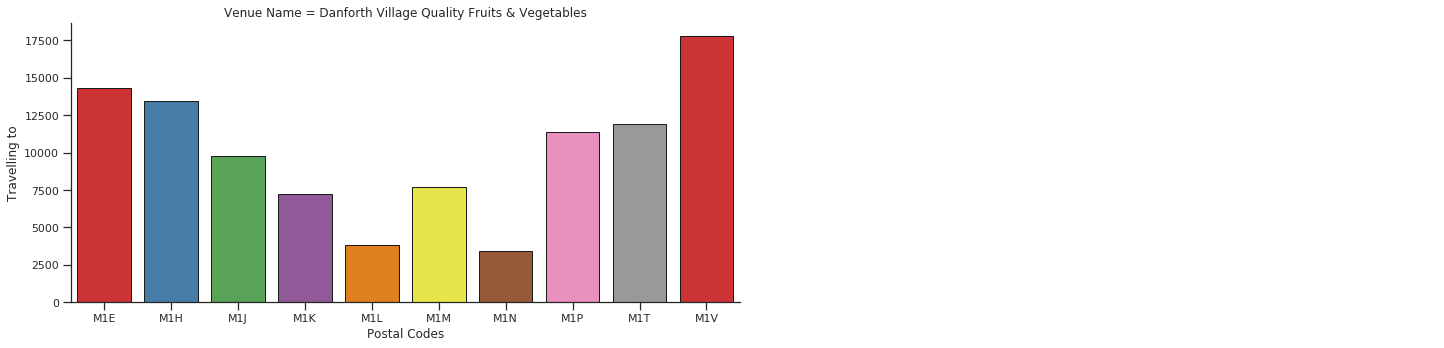

In [146]:
neighbourhood_data_plotters(to_pc_gis_fs_df)

- ### Data Plot for New York,New york with Neighbourhood origin zip codes and walking distance on x,y plane.The name of Grocers available per postal codes is provided as column  for each zip code for every plot.

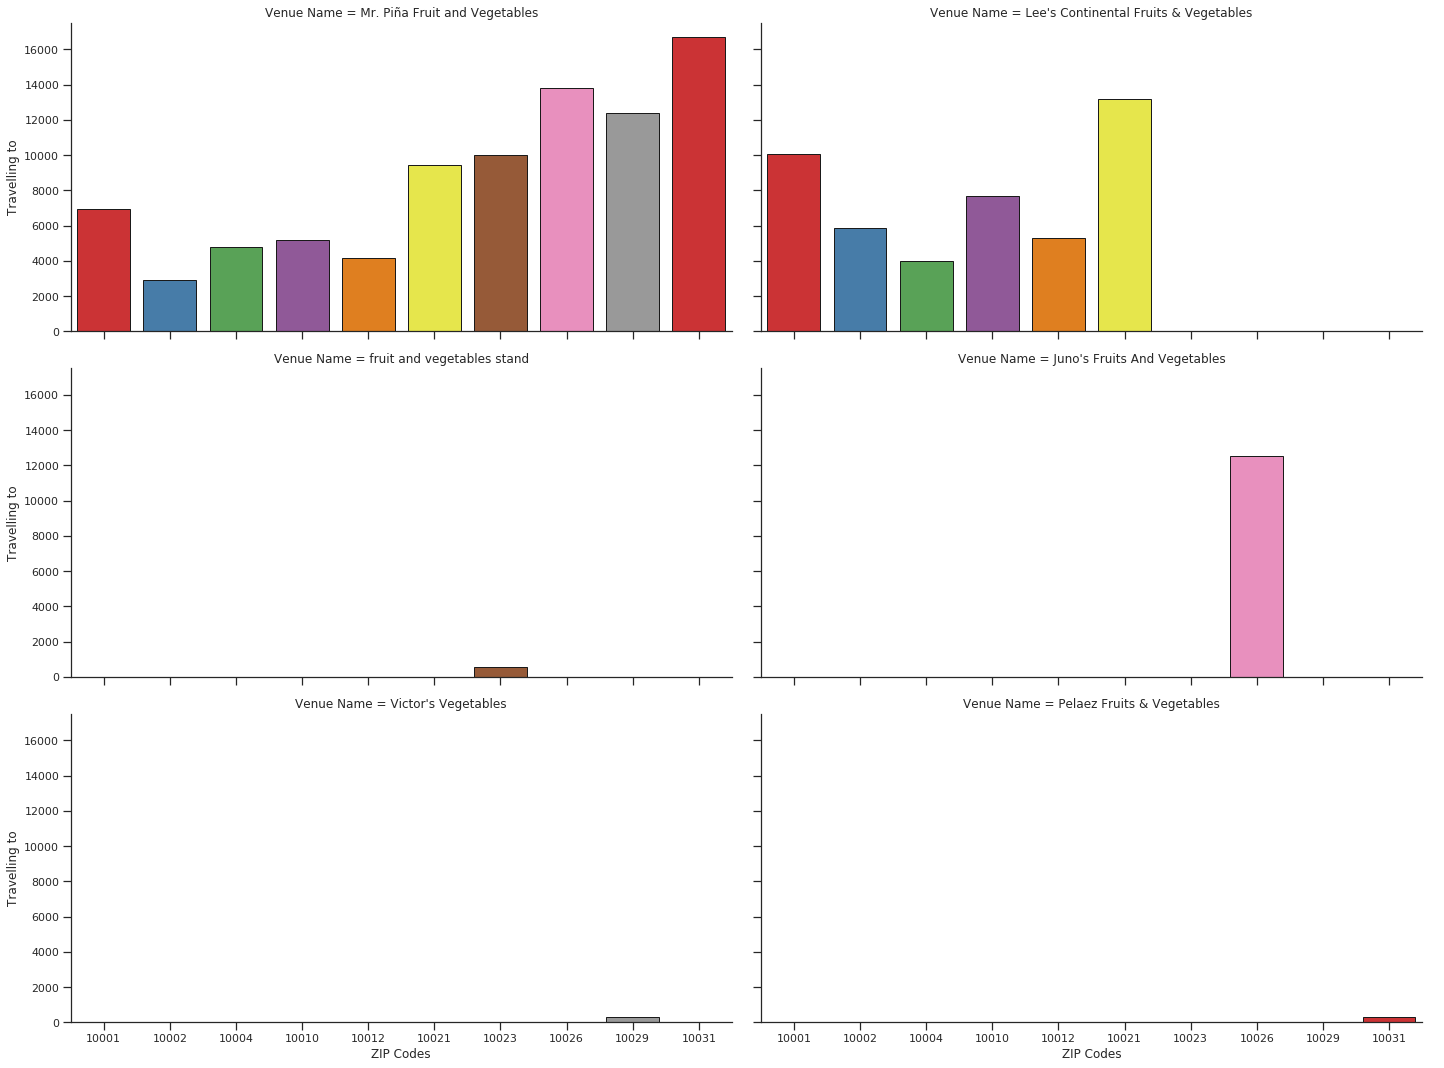

In [147]:
neighbourhood_data_plotters(ny_ziph_gis_fs_df)

In [148]:
!pip install folium

In [149]:
import folium

def map_pc_ziph_gis_to_fs_gis(pc_ziph_gis_fs_df = None):
    pc_ziph = 'Postcode'
    pc_ziph_disp = 'Postal Code'
    zoom = 12
    if pc_ziph_gis_fs_df is None:
        return 
    if pc_ziph in pc_ziph_gis_fs_df.columns:
        pc_ziph_disp = 'Postal Code'
        pc_ziph_map_data = pc_ziph_gis_fs_df[[pc_ziph,'latitude','longitude','fs_lat','fs_lng']]
    else:
        pc_ziph = pc_ziph_disp = 'ZIP Codes'
        zoom = 13
        pc_ziph_map_data = pc_ziph_gis_fs_df[[pc_ziph,'latitude','longitude','fs_lat','fs_lng']]
    
    pc_ziph_map_data.columns = [pc_ziph_disp,'latitude','longitude','fs_lat','fs_lng']
    
    m = folium.Map(location = [pc_ziph_map_data.loc[0,'latitude'],pc_ziph_map_data.loc[0,'longitude']],
                   tiles = 'Stamen Toner',
                   zoom_start = zoom,
                   width = 750, 
                   height = 1200,
                   no_touch = True,
                  )
 
    fg = folium.map.FeatureGroup()
    for row in range(pc_ziph_map_data.shape[0]):
    
        fg.add_child (
        folium.vector_layers.CircleMarker(
            [pc_ziph_map_data.loc[row,'latitude'],pc_ziph_map_data.loc[row,'longitude']],
            tiles = 'Stamen Toner',
            radius =5,
            color='yellow',
            fill = True,
            fill_color = 'blue',
            fill_opacity = 0.6
            )
        )
        fg.add_child (
        folium.vector_layers.CircleMarker(
            [pc_ziph_map_data.loc[row,'fs_lat'],pc_ziph_map_data.loc[row,'fs_lng']],
            tiles = 'Stamen Toner',
            radius =5,
            color='black',
            fill = True,
            fill_color = 'red',
            fill_opacity = 0.6
            )
        )
    
    m.add_child(fg)
    return m
    

In [150]:
to_pc_gis_fs_m = map_pc_ziph_gis_to_fs_gis(to_pc_gis_fs_df)
to_pc_gis_fs_m 

In [151]:
ny_ziph_gis_fs_m = map_pc_ziph_gis_to_fs_gis(ny_ziph_gis_fs_df)
ny_ziph_gis_fs_m 

# Data Preparation

In [152]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder

def data_preprocessor_common(fs_df):
    use_pc_ziph = 'Postcode'
    if use_pc_ziph in fs_df.columns:
        X = copy.copy(fs_df[['ghf_dist','fs_id','Postcode']])
    else:
        X = copy.copy(fs_df[['ghf_dist','fs_id','ZIP Codes']])
        use_pc_ziph = 'ZIP Codes'
    le_id = LabelEncoder()
    le_id.fit(X['fs_id'].to_list())
    le_po = LabelEncoder()
    le_po.fit(X[use_pc_ziph].to_list())
    X['fs_id'] = le_id.transform(X['fs_id'].to_list())
    X[use_pc_ziph] = le_po.transform(X[use_pc_ziph].to_list())
    cluster_data = StandardScaler().fit_transform(X)
    return cluster_data
    

- ### Preprocessing of Toronto Neighbourhood Data

In [153]:
cluster_data_to_pc = data_preprocessor_common(to_pc_gis_fs_df)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


- ### Preprocessing of New York Neighbourhood

In [154]:
cluster_data_ny_ziph = data_preprocessor_common(ny_ziph_gis_fs_df)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Data Modeling

In [155]:
def cluster_modeler_common(cluster_data):
    kmeans = KMeans(init = "k-means++",n_clusters=4,n_init=12)
    kmeans.fit(cluster_data)
    labels = kmeans.labels_
    return labels
    

- ### Modeling of Toronto Neighbourhood  Data

In [156]:
to_pc_gis_fs_df_label = copy.copy(to_pc_gis_fs_df)

In [157]:
to_pc_gis_fs_df_label['labels'] = cluster_modeler_common(cluster_data_to_pc)


In [158]:
to_pc_gis_fs_df_label

,ghf_dist,ghr_dist,ghf_time,ghr_time,fs_requestId,fs_id,fs_name,fs_address,fs_lat,fs_lng,fs_cc,fs_postalCode,Postcode,latitude,longitude,labels
0,14310,14310,10303,10303,5e1ca7927828ae001b020866,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1E,43.7678,-79.1866,1
1,13462,13462,9693,9693,5e1ca7441835dd001ba173a3,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1H,43.7686,-79.2389,1
2,9783,9783,7044,7044,5e1ca73e1d67cb001be26d29,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1J,43.7464,-79.2323,1
3,7265,7265,5231,5231,5e1ca7f0df2774001c883242,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1K,43.7298,-79.2639,0
4,3833,3833,2760,2760,5e1ca7789388d7001bb7aae2,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1L,43.7122,-79.2843,0
5,7730,7730,5566,5566,5e1ca741211536001c892df9,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1M,43.7247,-79.2312,0
6,3399,3399,2447,2447,5e1ca75f760a7f001b866691,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1N,43.6952,-79.2646,0
7,11373,11373,8188,8188,5e1ca7ae0be7b4001bfa88c4,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1P,43.7612,-79.2707,2
8,11884,11884,8556,8556,5e1ca7451835dd001ba179b0,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1T,43.7812,-79.3036,2
9,17793,17793,12811,12811,5e1ca79760ba08001bc51a78,4e7cdef5091a90560cc9a8db,Danforth Village Quality Fruits & Vegetables,2515 Danforth Avenue,43.687844,-79.302278,CA,M4C 1L1,M1V,43.8177,-79.2819,3


- ### Modeling of New York Neighbourhood Data

In [159]:
ny_ziph_gis_fs_df_label = copy.copy(ny_ziph_gis_fs_df)

In [160]:
ny_ziph_gis_fs_df_label['labels'] = cluster_modeler_common(cluster_data_ny_ziph)

In [161]:
ny_ziph_gis_fs_df_label

,ghf_dist,ghr_dist,ghf_time,ghr_time,fs_requestId,fs_id,fs_name,fs_address,fs_lat,fs_lng,fs_cc,fs_postalCode,ZIP Codes,latitude,longitude,labels
0,6967,6967,5016,5016,5e1ca7ea1e152c001b63d82f,4fb44e61e4b0557240bf1470,Mr. Piña Fruit and Vegetables,219 Havemeyer St,40.709355,-73.959275,US,11211,10001,40.7484,-73.9967,3
1,10039,10039,4146,4146,5e1ca7ea1e152c001b63d82f,4adcfb64f964a520246321e3,Lee's Continental Fruits & Vegetables,309 Grove St,40.719130,-74.043194,US,07302,10001,40.7484,-73.9967,0
2,2894,2894,2084,2084,5e1ca7dc0cc1fd001be9b190,4fb44e61e4b0557240bf1470,Mr. Piña Fruit and Vegetables,219 Havemeyer St,40.709355,-73.959275,US,11211,10002,40.7152,-73.9877,3
3,5888,5888,4001,4001,5e1ca7dc0cc1fd001be9b190,4adcfb64f964a520246321e3,Lee's Continental Fruits & Vegetables,309 Grove St,40.719130,-74.043194,US,07302,10002,40.7152,-73.9877,0
4,4788,4788,3448,3448,5e1ca7e7d03993001b5033a1,4fb44e61e4b0557240bf1470,Mr. Piña Fruit and Vegetables,219 Havemeyer St,40.709355,-73.959275,US,11211,10004,40.7143,-74.0060,3
5,3976,3976,2624,2624,5e1ca7e7d03993001b5033a1,4adcfb64f964a520246321e3,Lee's Continental Fruits & Vegetables,309 Grove St,40.719130,-74.043194,US,07302,10004,40.7143,-74.0060,0
6,5186,5186,3734,3734,5e1ca6dd02a1720028b00942,4fb44e61e4b0557240bf1470,Mr. Piña Fruit and Vegetables,219 Havemeyer St,40.709355,-73.959275,US,11211,10010,40.7375,-73.9813,3
7,7681,7681,5295,5295,5e1ca6dd02a1720028b00942,4adcfb64f964a520246321e3,Lee's Continental Fruits & Vegetables,309 Grove St,40.719130,-74.043194,US,07302,10010,40.7375,-73.9813,0
8,4143,4143,2983,2983,5e1ca7e8d03993001b5035c5,4fb44e61e4b0557240bf1470,Mr. Piña Fruit and Vegetables,219 Havemeyer St,40.709355,-73.959275,US,11211,10012,40.7255,-73.9983,3
9,5300,5300,3581,3581,5e1ca7e8d03993001b5035c5,4adcfb64f964a520246321e3,Lee's Continental Fruits & Vegetables,309 Grove St,40.719130,-74.043194,US,07302,10012,40.7255,-73.9983,0


# Data Evaluation

## Common plotting functions.

In [162]:
def neighbourhood_labelled_data_plotters(pc_ziph_fs_df_label):
    pc_ziph = 'Postcode'
    pc_ziph_disp = 'Postal Codes'
    if pc_ziph not in pc_ziph_fs_df_label.columns:
        pc_ziph = pc_ziph_disp = 'ZIP Codes'
    
    venue_plot = pc_ziph_fs_df_label[[pc_ziph,'fs_name','ghf_dist','labels']]
    venue_plot.columns = [pc_ziph_disp,'Venue Name','Travelling to','Zone']
    venue_plot = venue_plot.sort_values(by = pc_ziph_disp).reset_index().drop('index',axis=1)
    
    sns.set(style="ticks", rc = {"xtick.major.size":8,"ytick.major.size":8})
    g = sns.catplot(kind = "bar",
                    y = "Travelling to",
                    x = pc_ziph_disp,
                    col = "Zone",
                    col_wrap = 2,
                    hue = "Venue Name",
                    legend = True,
                    legend_out = False,
                    data = venue_plot,
                    palette = "Set1",
                    height = 5,
                    aspect = 2.0,
                    ec = "k")
    g.set_axis_labels(pc_ziph_disp, "Travelling to")
    g.despine()
    plt.tight_layout()
    plt.show()
    

### Data Plot for Toronto,Ontario with Neighbourhood as labelled clusters and walking distance on x,y plane.
- The count of stores available per Neighbourhood cluster is provided for each cluster as colored hue.

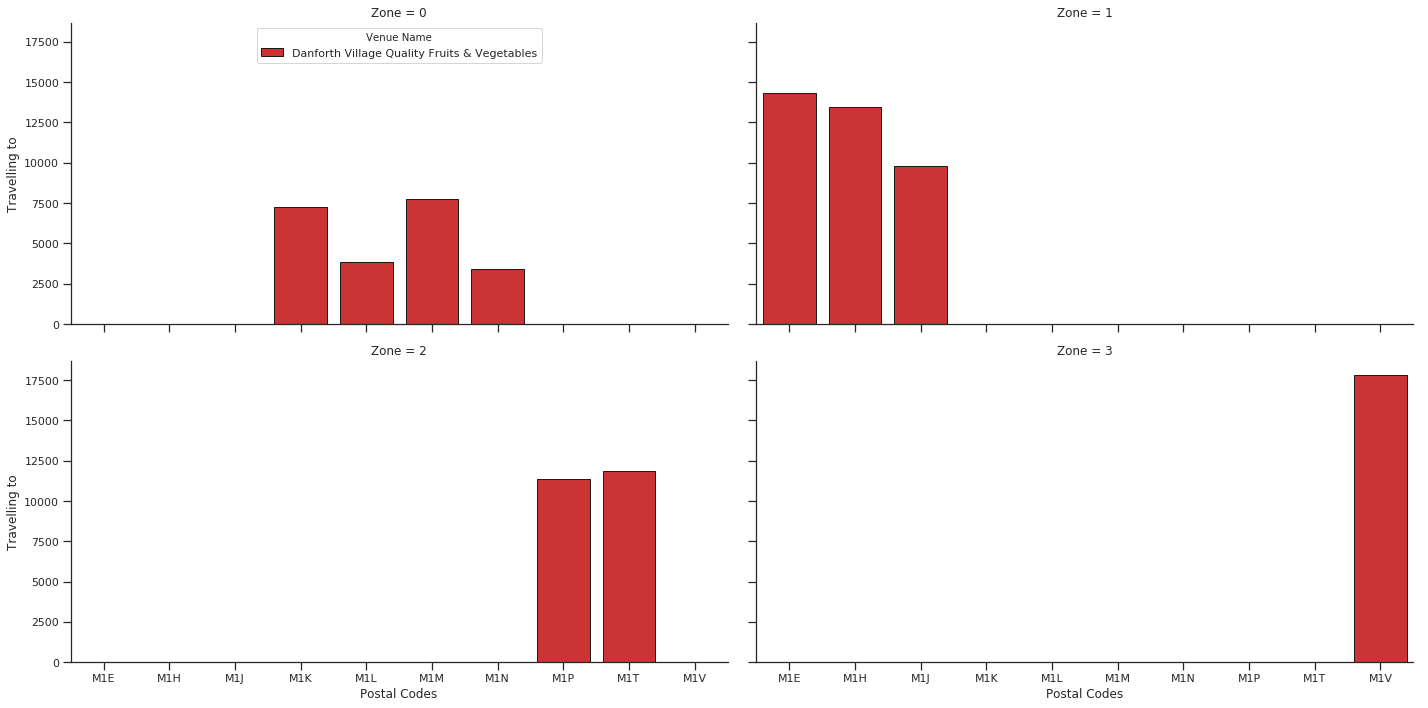

In [163]:
neighbourhood_labelled_data_plotters(to_pc_gis_fs_df_label)

Data Plot for New York,New York with Neighbourhood as labelled clusters and walking distance on x,y plane.
The count of stores available per Neighbourhood cluster is provided for each cluster as colored hue.

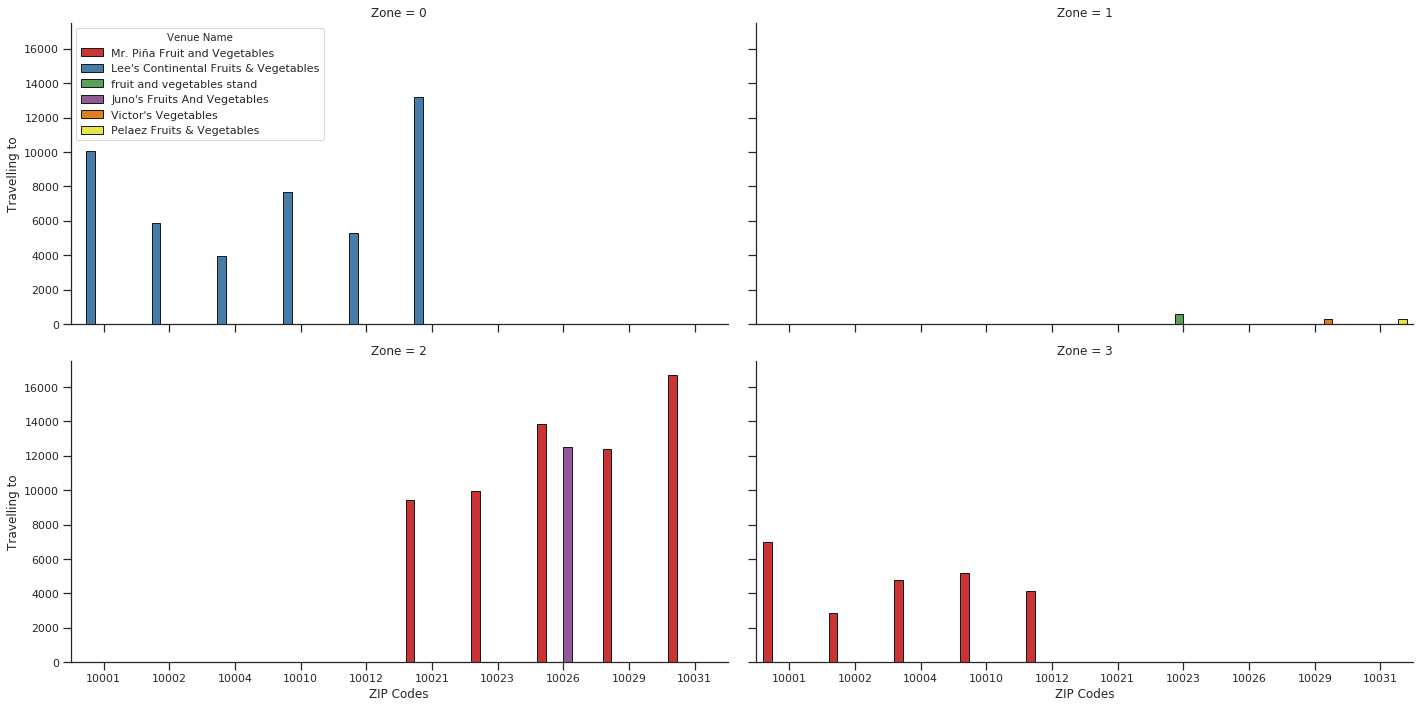

In [164]:
neighbourhood_labelled_data_plotters(ny_ziph_gis_fs_df_label)

# Conclusion

- ## Conclusions from the data analysis of Toronto,Ontario.
    - The foursquare data for Toronto,Ontario returned only one business listed as Grocer for vegetables with an actual physical address and postal code listed in the foursquare database. 
    - To increase the reliability the foursquare database was limited to resturn 3 business listing per query or customer zip codes in this case.
    - The data plots shows that the traveling distances to the single grocer range from 3.3 km to 17.5 km for the various postal codes.
    - The K-means clustering is primarily influenced by the walking distances to these locations. The zone labeled as 0 turns out to be the most habitable zone as far as pedstrian walking to these grocers are concerned. This is most prominent in the bar plot of various postal codes and the corresponding labels using k-means clustering.
   


- ## Conclusions from the data analysis of New York,New York
    - The foursquare data for New York,New York returned three business listed as Grocer for vegetables with an actual physical address and zip code listed in the foursquare database.
    - To increase the reliability the foursquare database was limited to resturn 2 business listing per query or customer zip codes in this case.
    - The data show that the waking distances to the grocers range from 290 m to 16.7 km for various postal codes.
    - The K-means clustering is primarily influenced by the walking distances to these locations. The zone labeled as 1 turns out to be least habitable as far as pedestrian walking to these grocers are concerned. zone 0 and zone 3 offer only one grocer as a choice.
